## `geom_curve()`

Параметры:

* `curvature` - числовое значение, указывающее величину кривизны. Отрицательные значения создают левые кривые, положительные значения - правые кривые, а ноль - прямую линию. Default = 0.5.

* `angle` - числовое значение, указывающее величину отклонения контрольных точек кривой. Значения меньше 90 смещают кривую к начальной точке, а значения больше 90 смещают кривую к конечной точке. Default = 90.

* `ncp` - количество контрольных точек, используемых для построения кривой. Больше контрольных точек создает более плавную кривую.  Default = 5.

In [1]:
from lets_plot import *


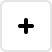
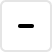
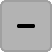
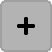
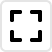
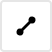
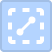
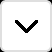
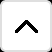
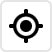
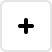
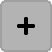
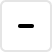
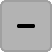
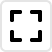
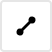
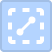
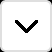
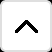
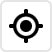

In [2]:
LetsPlot.setup_html()

In [3]:
LetsPlot.set_theme(theme_grey())

In [4]:
DEF_ANGLE = 90.0
DEF_CURVATURE = 0.5
DEF_NCP = 5

def curve_plot(curvature=DEF_CURVATURE, angle=DEF_ANGLE, ncp=DEF_NCP):
    return ggplot() + \
            geom_point(aes('x', 'y'), data = { 'x': [-30, 30], 'y': [-10,10] }) + \
            geom_curve(x = -20, y = 1, xend = 10, yend = -1, 
                       curvature = curvature, angle = angle, ncp = ncp,
                       arrow=arrow(ends='both')) + \
            ggtitle("curvature={0}, angle={1}, ncp={2}".format(curvature, angle, ncp))

def curves(curvature=DEF_CURVATURE, angle=DEF_ANGLE, ncp=DEF_NCP):
    return gggrid([
        curve_plot(curvature=curvature, angle=angle, ncp=ncp),
        curve_plot(curvature=curvature, angle=-angle, ncp=ncp),
        curve_plot(curvature=-curvature, angle=angle, ncp=ncp),
        curve_plot(curvature=-curvature, angle=-angle, ncp=ncp)
    ], ncol = 2) #+ ggsize(950,600)


In [5]:
# straight line

curve_plot(curvature=0)

In [6]:
# straight line

gggrid([
    curve_plot(angle=0),
    curve_plot(angle=180)
])

In [7]:
gggrid([
    curve_plot(curvature=0.5, ncp=1),
    curve_plot(curvature=-0.5, ncp=1),
    curve_plot(curvature=0.5),
    curve_plot(curvature=-0.5)    
], ncol=2)

In [8]:
gggrid([
    curve_plot(curvature=1, ncp=1),
    curve_plot(curvature=-1, ncp=1),
    curve_plot(curvature=1),
    curve_plot(curvature=-1)
], ncol=2)

In [9]:
# angle: negative
# -30 == 150
# -240 == 120

gggrid([
    curve_plot(angle=-30), curve_plot(angle=150),
    curve_plot(angle=-240), curve_plot(angle=120),
], ncol=2)

In [10]:
# 45 == -315 == 405
gggrid([
    curve_plot(angle=45),
    curve_plot(angle=405),
    curve_plot(angle=-315)
])

In [11]:
curves(curvature=0.9, angle=45)

In [12]:
curves(curvature=1.3, angle=135)